# World Happiness Analyzation for Tableau

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# To keep matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#creating a path
path = r'/Users/jonahsnewmacbook/Desktop/Data Analytics/Data Immersion/Achievement 6/World Happiness'

In [6]:
#import World Happiness Dataframe
WH = pd.read_excel(os.path.join(path, 'Data', 'WorldHappinesscleaned.xlsx'))

In [7]:
WH.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region,Happiness Category
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,High Happiness
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Western Europe,High Happiness
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Western Europe,High Happiness
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Western Europe,High Happiness
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America,High Happiness


In [10]:
WH.shape

(782, 12)

In [11]:
WH.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
Region                           0
Happiness Category               0
dtype: int64

### I will export two more dataframe as I will join it to my WH dataframe

In [21]:
#import Life Expectancy Dataframe
LE = pd.read_excel(os.path.join(path, 'Data', 'Life Expectancy Cleaned.xlsx'))

In [22]:
#import GDP Dataframe
GDP = pd.read_excel(os.path.join(path, 'Data', 'GDP Cleaned.xlsx'))

In [27]:
LE.head()

,Country Name,Life Expectancy,Year
0,Aruba,75.683000,2015.0
1,Africa Eastern and Southern,61.856458,2015.0
2,Afghanistan,62.659000,2015.0
3,Africa Western and Central,56.195872,2015.0
4,Angola,60.655000,2015.0


In [28]:
LE.shape

(1330, 3)

In [24]:
GDP.head()

,Country Name,GDP,Year
0,Monaco,170338.680381,2015
1,Liechtenstein,167809.269875,2015
2,Luxembourg,105462.012584,2015
3,Bermuda,102005.625642,2015
4,Isle of Man,84753.456728,2015


In [29]:
GDP.shape

(1285, 3)

In [30]:
# clean the dataframes

In [31]:
LE.isnull().sum()

Country Name        0
Life Expectancy    42
Year                8
dtype: int64

In [32]:
LE.dropna(inplace = True)

In [33]:
LE.isnull().sum()

Country Name       0
Life Expectancy    0
Year               0
dtype: int64

In [34]:
LE.shape

(1288, 3)

In [35]:
GDP.isnull().sum()

Country Name    0
GDP             0
Year            0
dtype: int64

In [36]:
# LE and GDP are cleaned off of nulls
# now look for duplicates

In [37]:
#For LE
LEdups = LE.duplicated()

In [40]:
LEdups.shape #no duplicates

(1288,)

In [42]:
GDPdups = GDP.duplicated()

In [44]:
GDPdups.shape #no duplicates

(1285,)

### Merge the LE and GDP dataframe to WH

In [48]:
# First I need to change the title of LE 'Country Name' to 'Country'
LE = LE.rename(columns={'Country Name' : 'Country'})

In [49]:
LE.head(1)

,Country,Life Expectancy,Year
0,Aruba,75.683,2015.0


In [69]:
#combine WH on LE
WH_LE = WH.merge(LE, on = ['Country', 'Year'], how = 'inner')

In [70]:
WH_LE.head(1)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region,Happiness Category,Life Expectancy
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,High Happiness,82.897561


In [71]:
WH_LE.shape

(672, 13)

In [72]:
WH_LE.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                               int64
Region                            object
Happiness Category                object
Life Expectancy                  float64
dtype: object

In [58]:
#Now join WH_LE with the GDP

In [73]:
# Change the title of GDP 'Country Name' to 'Country'
GDP = GDP.rename(columns={'Country Name' : 'Country'})

In [74]:
GDP.head()

,Country,GDP,Year
0,Monaco,170338.680381,2015
1,Liechtenstein,167809.269875,2015
2,Luxembourg,105462.012584,2015
3,Bermuda,102005.625642,2015
4,Isle of Man,84753.456728,2015


In [75]:
#combine WH_LE on GDP
WH_LE_GDP = WH_LE.merge(GDP, on = ['Country', 'Year'], how = 'inner')

In [76]:
WH_LE_GDP.head(1)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region,Happiness Category,Life Expectancy,GDP
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Western Europe,High Happiness,82.897561,83806.4476


In [77]:
WH_LE_GDP.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                               int64
Region                            object
Happiness Category                object
Life Expectancy                  float64
GDP                              float64
dtype: object

In [78]:
WH_LE_GDP.shape

(668, 14)

### Clean the new dataframe

In [79]:
WH_LE_GDP.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
Region                           0
Happiness Category               0
Life Expectancy                  0
GDP                              0
dtype: int64

In [81]:
#save the new dataframe to excel
WH_LE_GDP.to_excel(os.path.join(path,'Data', 'WH_LE_GDP.xlsx'))

In [82]:
dups = WH_LE_GDP.duplicated()

In [85]:
dups.shape #no duplicated

(668,)

*** It's important to note that for this analysis we started of with 782 rows and now it's down to 668 rows (that is -114 rows). Since it was inner join, it only matched up the countries that it has and took off the rows that didn't have the same country name. ***

### With this new data frame, it's ready for analysis

#### 1. Scatterplot Happiness Score and GDP Score

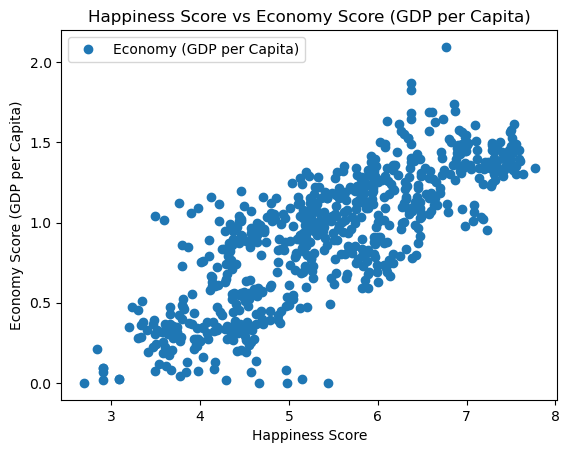

In [91]:
#Create a scatterplot (motplotlib)
WH_LE_GDP.plot(x = 'Happiness Score', y='Economy (GDP per Capita)',style='o') # 'o' means to choose scatterplot
plt.title('Happiness Score vs Economy Score (GDP per Capita)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Economy Score (GDP per Capita)')  
plt.show()

In [92]:
# Get the regression line
# Reshape the variables into NumPy arrays and put them into separate objects.

x = WH_LE_GDP['Happiness Score'].values.reshape(-1,1)
y = WH_LE_GDP['Economy (GDP per Capita)'].values.reshape(-1,1)

In [95]:
regression = LinearRegression()

In [96]:
regression.fit(x,y)

LinearRegression()

In [98]:
#Predict the values of y using x
y_predicted = regression.predict(x)

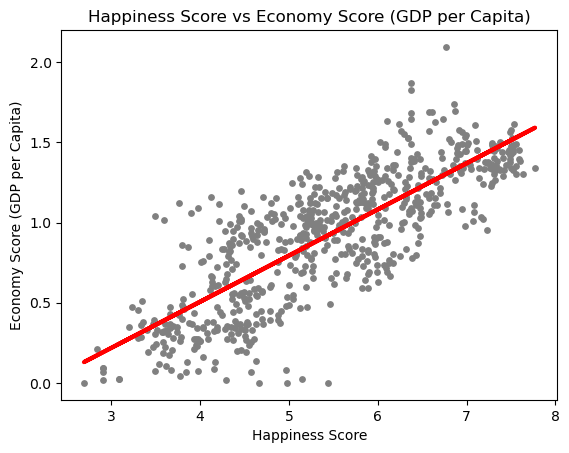

In [99]:
#Create a plot that shows the regression line 

plot_test = plt
plot_test.scatter(x, y, color='gray', s = 15)
plot_test.plot(x, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy Score (GDP per Capita)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy Score (GDP per Capita)')
plot_test.show()

In [101]:
#Create objects that contain the model summary statistics

rmse = mean_squared_error(y, y_predicted) 
r2 = r2_score(y, y_predicted) 

In [102]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2879686]]
Mean squared error:  0.06036926449947778
R2 score:  0.6440522561373452


#### 2. Scatterplot for Happiness Score and Actual GDP Recorded

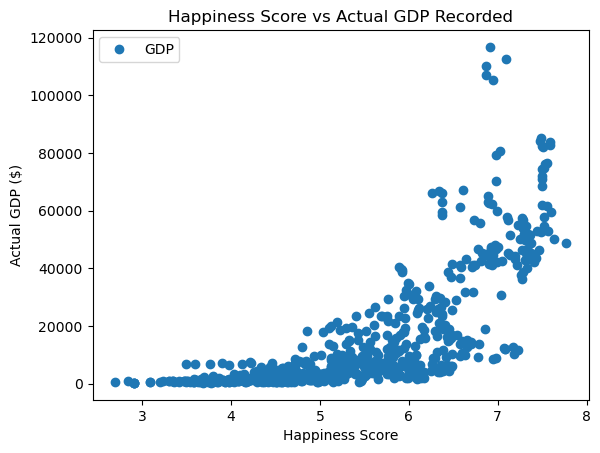

In [89]:
WH_LE_GDP.plot(x = 'Happiness Score', y='GDP',style='o') # 'o' means to choose scatterplot
plt.title('Happiness Score vs Actual GDP Recorded')  
plt.xlabel('Happiness Score')  
plt.ylabel('Actual GDP ($)')  
plt.show()

In [116]:
# Get the regression line
# Reshape the variables into NumPy arrays and put them into separate objects.

a = WH_LE_GDP['Happiness Score'].values.reshape(-1,1)
b = WH_LE_GDP['GDP'].values.reshape(-1,1)

In [117]:
regression = LinearRegression()

In [118]:
regression.fit(a,b)

LinearRegression()

In [119]:
#Predict the values of b using a
b_predicted = regression.predict(a)

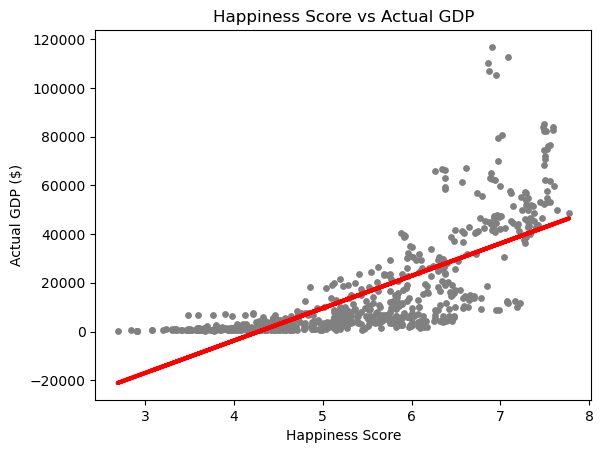

In [120]:
#Create a plot that shows the regression line 

plot_test = plt
plot_test.scatter(a, b, color='gray', s = 15)
plot_test.plot(a, b_predicted, color='red', linewidth =3)
plot_test1.title('Happiness Score vs Actual GDP')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Actual GDP ($)')
plot_test.show()

In [123]:
#Create objects that contain the model summary statistics

rmse = mean_squared_error(b, b_predicted) 
r2 = r2_score(b, b_predicted) 

In [124]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13293.45811862]]
Mean squared error:  202488250.5249992
R2 score:  0.5347913451521247


### 3. Happiness Score vs. Life Expectancy

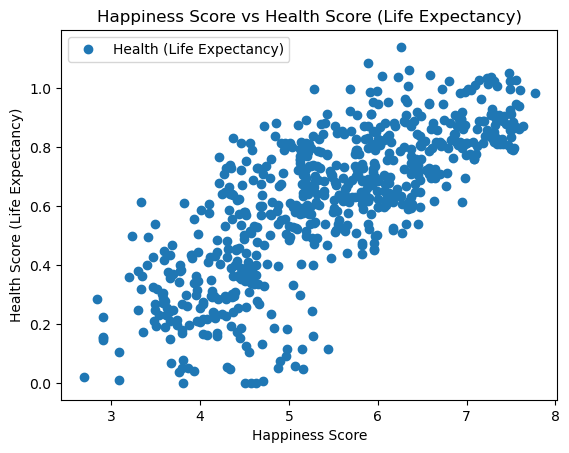

In [127]:
#Create a scatterplot (motplotlib)
WH_LE_GDP.plot(x = 'Happiness Score', y='Health (Life Expectancy)',style='o')
plt.title('Happiness Score vs Health Score (Life Expectancy)')  
plt.xlabel('Happiness Score')  
plt.ylabel('Health Score (Life Expectancy)')  
plt.show()

In [128]:
x = WH_LE_GDP['Happiness Score'].values.reshape(-1,1)
d = WH_LE_GDP['Health (Life Expectancy)'].values.reshape(-1,1)

In [129]:
d

array([[0.94143   ],
       [0.94784   ],
       [0.87464   ],
       [0.88521   ],
       [0.90563   ],
       [0.88911   ],
       [0.89284   ],
       [0.91087   ],
       [0.90837   ],
       [0.93156   ],
       [0.91387   ],
       [0.86027   ],
       [0.89042   ],
       [0.81444   ],
       [0.86179   ],
       [0.69702   ],
       [0.91894   ],
       [0.89533   ],
       [0.89667   ],
       [0.80925   ],
       [0.90943   ],
       [0.76276   ],
       [1.02525   ],
       [0.79661   ],
       [0.89186   ],
       [0.85857   ],
       [0.79733   ],
       [0.94579   ],
       [0.78723   ],
       [0.8116    ],
       [0.69077   ],
       [0.7385    ],
       [0.72025   ],
       [0.95562   ],
       [0.88721   ],
       [0.72492   ],
       [0.6082    ],
       [0.61483   ],
       [0.67737   ],
       [0.64425   ],
       [0.59772   ],
       [0.99111   ],
       [0.79075   ],
       [0.74716   ],
       [0.95446   ],
       [0.5392    ],
       [0.61826   ],
       [0.660

In [130]:
regression = LinearRegression()

In [131]:
regression.fit(x,d)

LinearRegression()

In [132]:
#Predict the values of d using x
d_predicted = regression.predict(x)

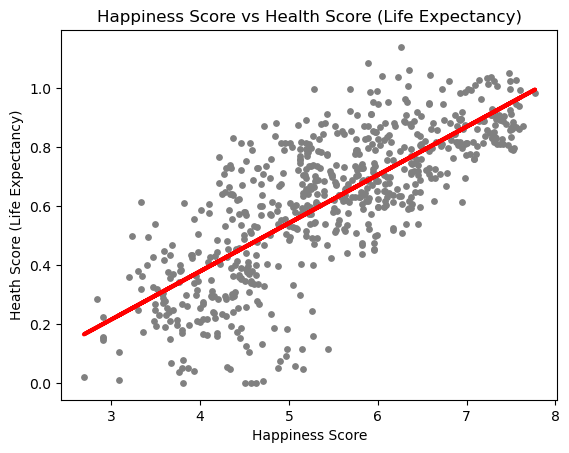

In [133]:
#Create a plot that shows the regression line 

plot_test = plt
plot_test.scatter(x, d, color='gray', s = 15)
plot_test.plot(x, d_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Health Score (Life Expectancy)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Heath Score (Life Expectancy)')
plot_test.show()

In [134]:
rmse = mean_squared_error(d, d_predicted) 
r2 = r2_score(d, d_predicted) 

In [135]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.16368297]]
Mean squared error:  0.025705649446085554
R2 score:  0.57857473334085


#### 4. Scatterplot for Happiness Score vs. Life Expectancy Actual

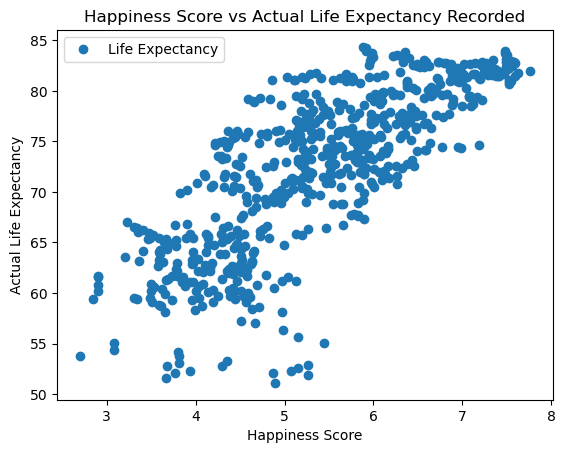

In [136]:
#Create a scatterplot (motplotlib)
WH_LE_GDP.plot(x = 'Happiness Score', y='Life Expectancy',style='o') # 'o' means to choose scatterplot
plt.title('Happiness Score vs Actual Life Expectancy Recorded')  
plt.xlabel('Happiness Score')  
plt.ylabel('Actual Life Expectancy')  
plt.show()

In [137]:
l = WH_LE_GDP['Life Expectancy'].values.reshape(-1,1)

In [138]:
l

array([[82.89756098],
       [82.46829268],
       [80.70243902],
       [82.30487805],
       [81.81560976],
       [81.4804878 ],
       [81.5097561 ],
       [82.20487805],
       [81.61243902],
       [82.4       ],
       [82.05121951],
       [79.086     ],
       [81.1902439 ],
       [74.682     ],
       [78.6902439 ],
       [74.332     ],
       [82.29268293],
       [81.45365854],
       [80.99268293],
       [79.223     ],
       [80.95609756],
       [77.687     ],
       [82.74390244],
       [77.468     ],
       [80.64146341],
       [79.746     ],
       [80.064     ],
       [82.32195122],
       [76.76      ],
       [77.483     ],
       [76.257     ],
       [77.717     ],
       [76.918     ],
       [82.83170732],
       [81.89756098],
       [79.562     ],
       [70.8       ],
       [74.503     ],
       [71.814     ],
       [72.103     ],
       [70.475     ],
       [83.79390244],
       [76.789     ],
       [79.405     ],
       [82.54390244],
       [67

In [139]:
regression = LinearRegression()

In [140]:
regression.fit(x,l)

LinearRegression()

In [141]:
#Predict the values of d using x
l_predicted = regression.predict(x)

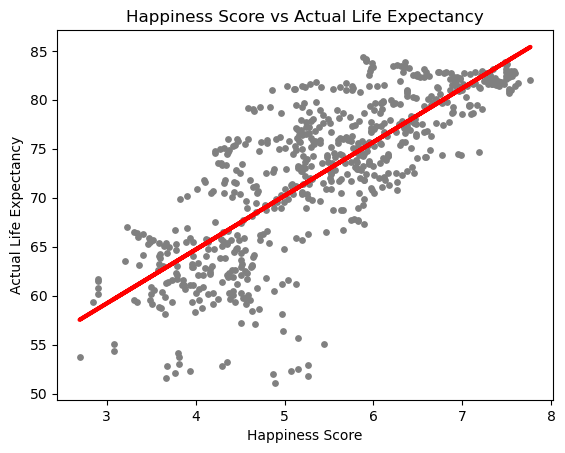

In [142]:
#Create a plot that shows the regression line 

plot_test = plt
plot_test.scatter(x, l, color='gray', s = 15)
plot_test.plot(x, l_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Actual Life Expectancy')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Actual Life Expectancy')
plot_test.show()

In [144]:
rmse = mean_squared_error(l, l_predicted) 
r2 = r2_score(l, l_predicted) 

In [145]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.48758047]]
Mean squared error:  23.869053170169693
R2 score:  0.6243188703069658


#### 4. Actual Life Expectancy and Family (Quick View - No Regression lines)

In [147]:
# First Health Score vs Family Score

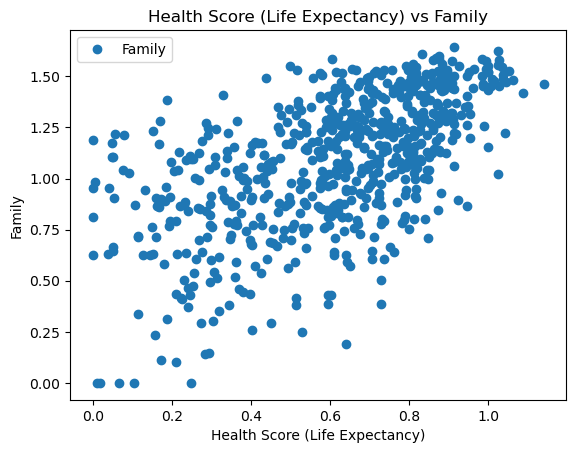

In [148]:
#Create a scatterplot (motplotlib)
WH_LE_GDP.plot(x = 'Health (Life Expectancy)', y='Family',style='o') # 'o' means to choose scatterplot
plt.title('Health Score (Life Expectancy) vs Family')  
plt.xlabel('Health Score (Life Expectancy)')  
plt.ylabel('Family')  
plt.show()

In [149]:
# Now, Actual Life Expectancy vs. Family Score

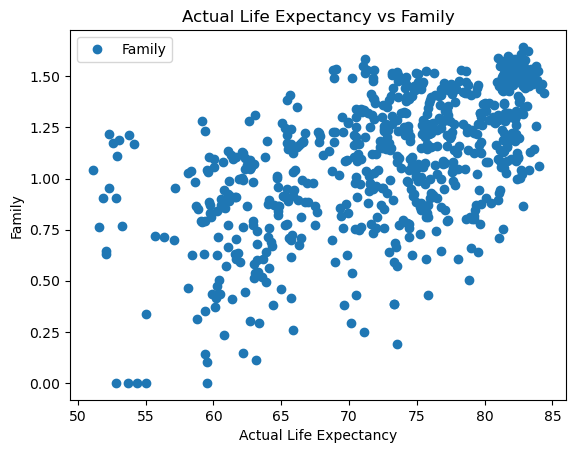

In [150]:
#Create a scatterplot (motplotlib)
WH_LE_GDP.plot(x = 'Life Expectancy', y='Family',style='o') # 'o' means to choose scatterplot
plt.title('Actual Life Expectancy vs Family')  
plt.xlabel('Actual Life Expectancy')  
plt.ylabel('Family')  
plt.show()